In [2]:
!pip install  gensim

  Created wheel for smart-open: filename=smart_open-2.1.0-py3-none-any.whl size=110324 sha256=43e0cd2643f27f416262f13f54c89ab866a1c747a957258306d7b63d1241b4f9
  Stored in directory: c:\users\tarun\appdata\local\pip\cache\wheels\a4\9b\d5\85705a7ab783cd6f7bd718f01d3b1396272f30044e3c36401a
  Created wheel for boto3: filename=boto3-1.14.47-py2.py3-none-any.whl size=127855 sha256=680b2ad137032ef4fa92611ccc97e562b7cf179b65e8aa0e3eb9392276977ff8
  Stored in directory: c:\users\tarun\appdata\local\pip\cache\wheels\3e\e9\68\d5222d804731508bc137ed40c6ad3b7720b469cdd60b8d0301
Successfully built smart-open boto3


In [31]:
import nltk

from gensim.models import Word2Vec
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import re


In [32]:
paragraph = """The COVID‑19 pandemic, also known as the coronavirus pandemic, is an ongoing global pandemic of 
               coronavirus disease 2019 (COVID‑19), caused by severe acute respiratory syndrome coronavirus 2 (SARS‑CoV‑2).[1] 
               The outbreak was first identified in December 2019 in Wuhan, China.[4][6] The World Health Organization declared the 
               outbreak a Public Health Emergency of International Concern on 30 January 2020 and a pandemic on 11 March.[7][8] As of
               20 August 2020, more than 22.5 
               million cases of COVID‑19 have been reported in more than 188 countries and territories, 
               resulting in more than 789,000 deaths; more than 14.3 million people have recovered.[5]
 
               The virus is spread primarily via nose and mouth secretions[9] including small droplets produced by coughing,[b] sneezing, 
               and talking.[11][12][13] The droplets usually do not travel through air over long distances.[11][14] However, 
               those standing in close proximity may inhale these droplets and become infected.[c] People may also become infected by
               touching a contaminated surface and then touching their face.[11][12] The transmission may also occur through smaller 
               droplets that are able to stay suspended in the air for longer periods of time in enclosed spaces.[9] It is most 
               contagious during the first three days after the onset of symptoms, although spread is possible before symptoms appear, and 
               from people who do not show symptoms.[11][12]
               Common symptoms include fever, cough, fatigue, shortness of breath, and loss of sense of smell.[11][15][16] 
               Complications may include pneumonia and acute respiratory distress syndrome.[17] The time from exposure to onset of 
               symptoms is typically around five days but may range from two to fourteen days.[18][19] There are several vaccine 
               candidates in development, although none have completed clinical trials to prove their safety and efficacy. 
               There is no known specific antiviral medication,[11] so primary treatment is currently symptomatic.[20]"""

In [33]:
text = re.sub(r'\[[0-9]*\]',' ',paragraph)
text = re.sub(r'\s+',' ',text)

text = text.lower()

text = re.sub(r'\d',' ',text)
text = re.sub(r'\s+',' ',text)

In [34]:
import nltk
nltk.download('punkt')
sentences = nltk.sent_tokenize(text)
sentences

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tarun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['the covid‑ pandemic, also known as the coronavirus pandemic, is an ongoing global pandemic of coronavirus disease (covid‑ ), caused by severe acute respiratory syndrome coronavirus (sars‑cov‑ ).',
 'the outbreak was first identified in december in wuhan, china.',
 'the world health organization declared the outbreak a public health emergency of international concern on january and a pandemic on march.',
 'as of august , more than .',
 'million cases of covid‑ have been reported in more than countries and territories, resulting in more than , deaths; more than .',
 'million people have recovered.',
 'the virus is spread primarily via nose and mouth secretions including small droplets produced by coughing,[b] sneezing, and talking.',
 'the droplets usually do not travel through air over long distances.',
 'however, those standing in close proximity may inhale these droplets and become infected.',
 '[c] people may also become infected by touching a contaminated surface and then touching

In [35]:
sent_word = [nltk.word_tokenize(sentence) for sentence in sentences]

In [36]:
sent_word

[['the',
  'covid‑',
  'pandemic',
  ',',
  'also',
  'known',
  'as',
  'the',
  'coronavirus',
  'pandemic',
  ',',
  'is',
  'an',
  'ongoing',
  'global',
  'pandemic',
  'of',
  'coronavirus',
  'disease',
  '(',
  'covid‑',
  ')',
  ',',
  'caused',
  'by',
  'severe',
  'acute',
  'respiratory',
  'syndrome',
  'coronavirus',
  '(',
  'sars‑cov‑',
  ')',
  '.'],
 ['the',
  'outbreak',
  'was',
  'first',
  'identified',
  'in',
  'december',
  'in',
  'wuhan',
  ',',
  'china',
  '.'],
 ['the',
  'world',
  'health',
  'organization',
  'declared',
  'the',
  'outbreak',
  'a',
  'public',
  'health',
  'emergency',
  'of',
  'international',
  'concern',
  'on',
  'january',
  'and',
  'a',
  'pandemic',
  'on',
  'march',
  '.'],
 ['as', 'of', 'august', ',', 'more', 'than', '.'],
 ['million',
  'cases',
  'of',
  'covid‑',
  'have',
  'been',
  'reported',
  'in',
  'more',
  'than',
  'countries',
  'and',
  'territories',
  ',',
  'resulting',
  'in',
  'more',
  'than',
  '

In [37]:
for i in range(len(sent_word)):
    sent_word[i] = [word for word in sent_word[i]
                    if word not in stopwords.words('english')]

In [38]:
sent_word

[['covid‑',
  'pandemic',
  ',',
  'also',
  'known',
  'coronavirus',
  'pandemic',
  ',',
  'ongoing',
  'global',
  'pandemic',
  'coronavirus',
  'disease',
  '(',
  'covid‑',
  ')',
  ',',
  'caused',
  'severe',
  'acute',
  'respiratory',
  'syndrome',
  'coronavirus',
  '(',
  'sars‑cov‑',
  ')',
  '.'],
 ['outbreak', 'first', 'identified', 'december', 'wuhan', ',', 'china', '.'],
 ['world',
  'health',
  'organization',
  'declared',
  'outbreak',
  'public',
  'health',
  'emergency',
  'international',
  'concern',
  'january',
  'pandemic',
  'march',
  '.'],
 ['august', ',', '.'],
 ['million',
  'cases',
  'covid‑',
  'reported',
  'countries',
  'territories',
  ',',
  'resulting',
  ',',
  'deaths',
  ';',
  '.'],
 ['million', 'people', 'recovered', '.'],
 ['virus',
  'spread',
  'primarily',
  'via',
  'nose',
  'mouth',
  'secretions',
  'including',
  'small',
  'droplets',
  'produced',
  'coughing',
  ',',
  '[',
  'b',
  ']',
  'sneezing',
  ',',
  'talking',
  '.'

In [39]:
model = Word2Vec(sent_word, min_count=1)
words = model.wv.vocab

In [40]:
vector = model.wv['pandemic']
print(vector)

[-5.4954778e-04 -1.0642726e-03  3.2817500e-03  4.0768343e-03
 -2.5678885e-03 -2.9171393e-03  7.0596265e-04 -1.8011337e-03
 -2.0232147e-03  3.0860009e-03  3.1555600e-03 -2.6546486e-03
  4.1234130e-03  4.6181120e-03  9.3367940e-04 -1.2753330e-03
  3.1583004e-03 -1.3447423e-03  3.0269020e-03  1.5298990e-03
 -2.7693864e-03  3.4180318e-03 -2.8022467e-03 -7.1561692e-04
 -2.4568115e-03  3.2755674e-03  2.1784373e-03  1.1349020e-03
 -3.5279363e-03  1.0718489e-03  6.5683923e-04  3.3441624e-03
  1.4001329e-03  4.3311738e-03 -8.9509727e-04 -3.4625910e-04
  8.6248631e-04 -3.8371708e-03  8.4619847e-04  4.4631758e-03
  1.7473531e-03  4.4749989e-03  1.6880810e-04 -3.9272886e-03
  2.8934968e-03  4.5568389e-03 -3.3730737e-04  4.4464753e-03
 -3.9409199e-03  4.6563800e-03  4.8674769e-03 -1.9349997e-03
  4.2667082e-03 -3.4909910e-03 -2.4804950e-03 -9.8337408e-04
 -3.6237307e-03 -1.0612389e-03  4.7194604e-03  1.4713189e-03
  4.4635446e-03 -2.6143002e-03  4.4023083e-03  1.8026148e-03
  2.5122808e-03  4.42036

In [41]:
similar = model.wv.most_similar('respiratory',topn=5)
similar

[('distances', 0.24279044568538666),
 ('touching', 0.22885680198669434),
 ('suspended', 0.2263302505016327),
 ('identified', 0.17791010439395905),
 ('appear', 0.16004033386707306)]

In [42]:
model.wv.similarity(w1='touching',w2='transmission')

0.15112305

In [43]:
model.wv.similarity(w1='pandemic',w2='pandemic')

1.0

In [44]:
model.wv.doesnt_match(["touching","transmission","symptoms"])

C:\Users\tarun\anaconda3\envs\tensorflowww\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'symptoms'

C:\Users\tarun\anaconda3\envs\tensorflowww\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


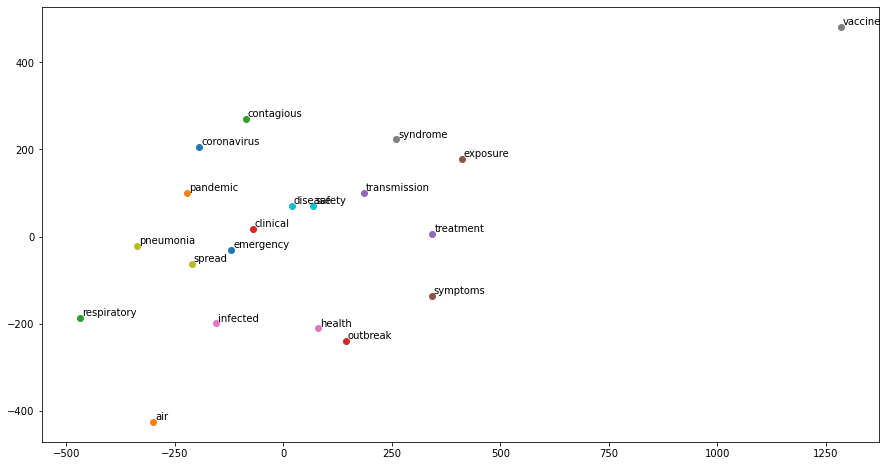

In [60]:
from sklearn.manifold import  TSNE
vocab = ['coronavirus','pandemic','respiratory','outbreak','transmission','symptoms','infected','vaccine','spread','disease',
         'emergency','air','contagious','clinical','treatment','exposure','health','syndrome','pneumonia','safety']
def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=3, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(15,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points', ha='left')

    plt.show()

tsne_plot(model)